Fish Weight Prediction

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [115]:
fish = pd.read_csv('Fish.csv')

In [116]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [117]:
fish.shape

(159, 7)

In [118]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [119]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [120]:
fish.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [121]:
fish['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

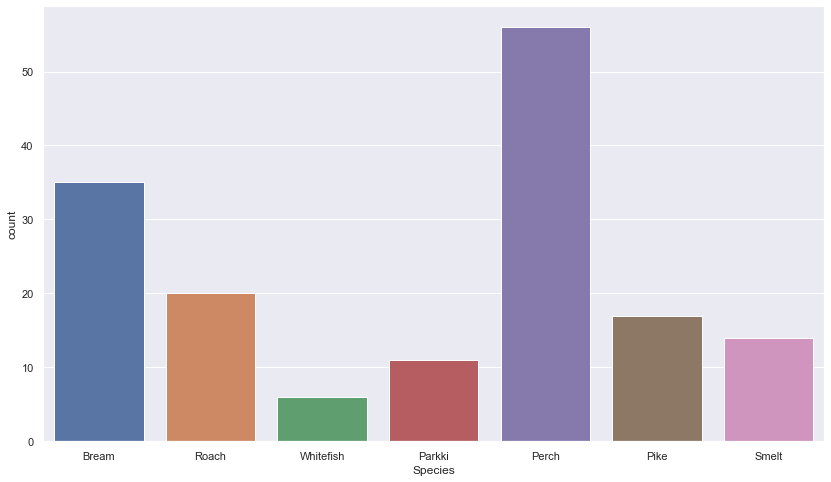

In [122]:
sn.set(style='darkgrid')
plt.figure(figsize=(14,8))
sn.countplot(fish['Species'])

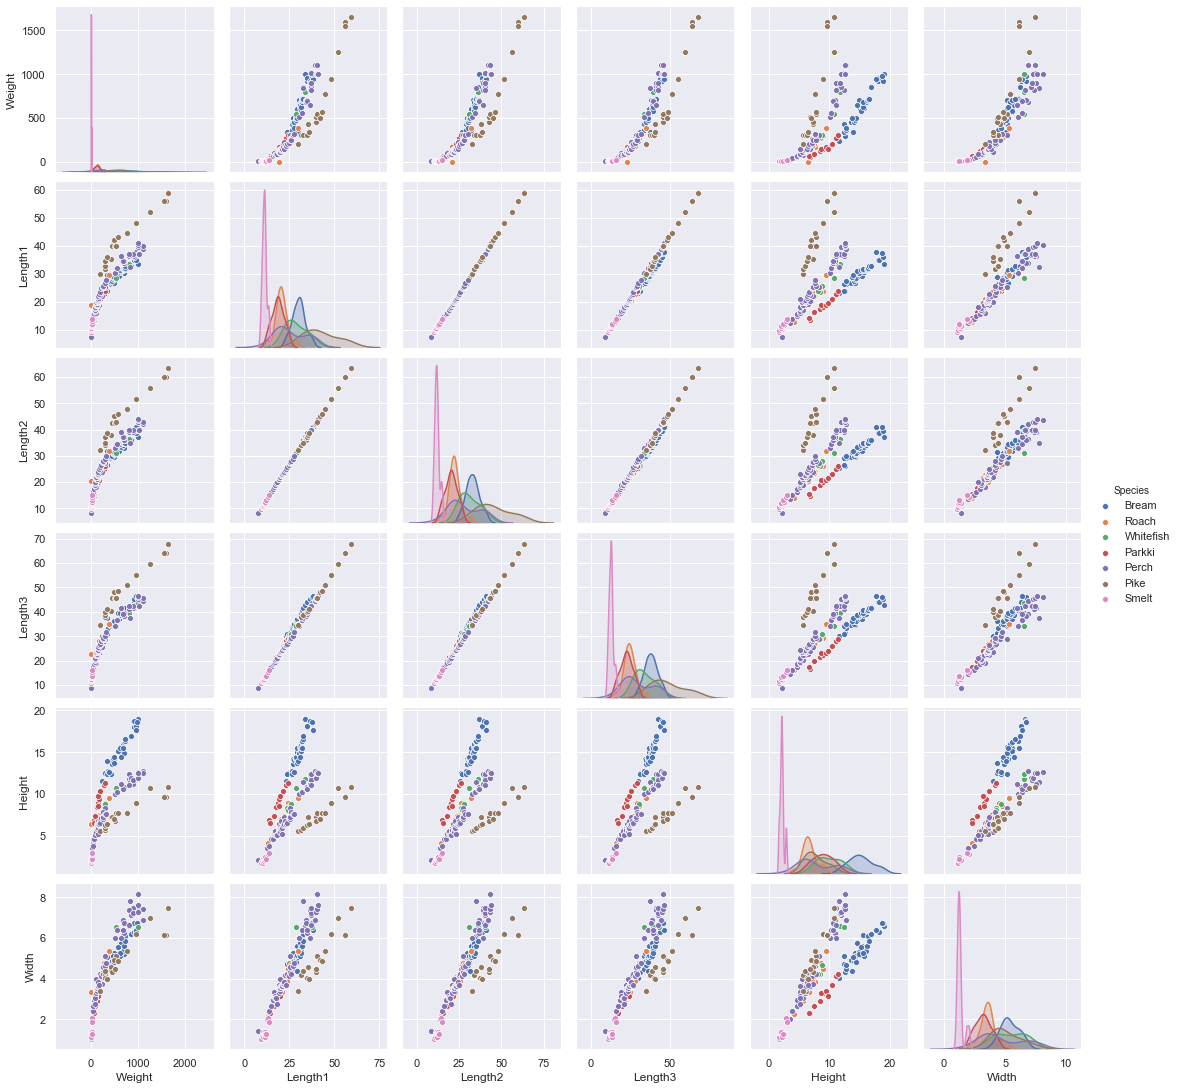

In [123]:
sn.pairplot(fish, kind='scatter', hue='Species')

In [124]:
corrm=fish.corr()
corrm

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

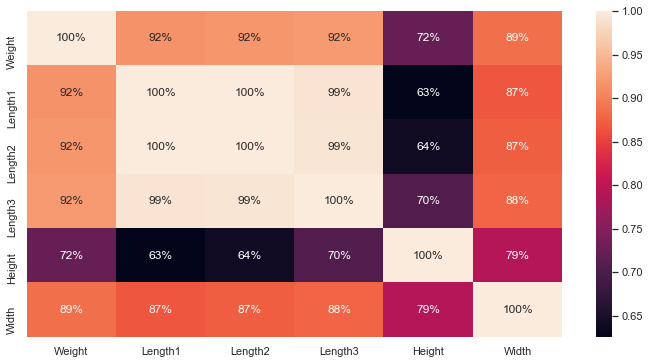

In [125]:
plt.figure(figsize=(12,6))
sn.heatmap(corrm,annot=True,fmt='.0%')
plt.show

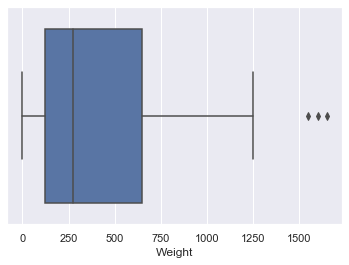

In [126]:
sn.boxplot(x=fish['Weight'])

In [127]:
fd = fish['Weight']
fd_Q1=fd.quantile(0.25)
fd_Q3=fd.quantile(0.75)
fd_Q2=fd_Q3-fd_Q1
min_outlier=fd_Q1-(1.5*fd_Q2)
max_outlier=fd_Q3+(1.5*fd_Q2)

In [128]:
outliers = fd[(fd < min_outlier) | (fd > max_outlier)]
outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

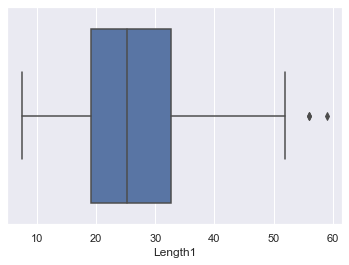

In [129]:
sn.boxplot(x=fish['Length1'])

In [130]:
fl = fish['Length1']
fl_Q1 = fl.quantile(0.25)
fl_Q3 = fl.quantile(0.75)
fl_Q2 = fl_Q3-fl_Q1
min_ol_fl = fl_Q1-(1.5*fl_Q2)
max_ol_fl = fl_Q3+(1.5*fl_Q2)

In [131]:
fl_outliers = fl[(fl < min_ol_fl) | (fl>max_ol_fl)]
fl_outliers

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

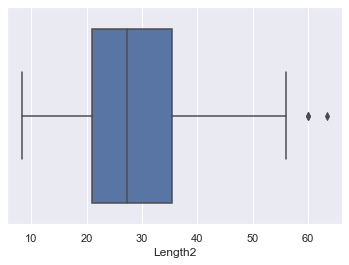

In [132]:
sn.boxplot(x=fish['Length2'])

In [133]:
fm = fish['Length2']
fm_Q1= fm.quantile(0.25)
fm_Q3= fm.quantile(0.75)
fm_Q2= fm_Q3-fm_Q1
min_ol_fm= fm_Q1-(1.5*fm_Q2)
max_ol_fm= fm_Q3+(1.5*fm_Q2)

In [134]:
fm_outliers= fm[(fm<min_ol_fm)|(fm>max_ol_fm)]
fm_outliers

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

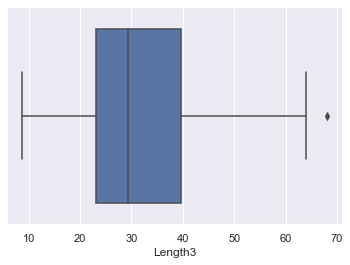

In [135]:
sn.boxplot(x=fish['Length3'])

In [136]:
fn = fish['Length3']
fn_Q1= fn.quantile(0.25)
fn_Q3= fn.quantile(0.75)
fn_Q2= fn_Q3-fn_Q1
min_ol_fn= fn_Q1-(1.5*fn_Q2)
max_ol_fn= fn_Q3+(1.5*fn_Q2)

In [137]:
fn_outliers= fn[(fn < min_ol_fn) | (fn > max_ol_fn)]
fn_outliers

144    68.0
Name: Length3, dtype: float64

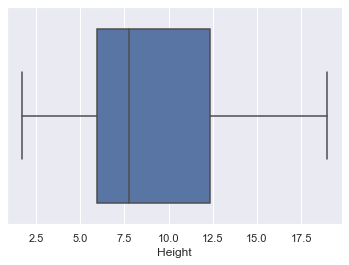

In [138]:
sn.boxplot(x=fish['Height'])

In [139]:
fh = fish['Height']
fh_Q1= fh.quantile(0.25)
fh_Q3= fh.quantile(0.75)
fh_Q2= fh_Q3-fh_Q1
min_ol_fh= fh_Q1-(1.5*fh_Q2)
max_ol_fh= fh_Q3+(1.5*fh_Q2)

In [140]:
fh_outliers = fh[(fh < min_ol_fh)|(fh>max_ol_fh)]
fh_outliers

Series([], Name: Height, dtype: float64)

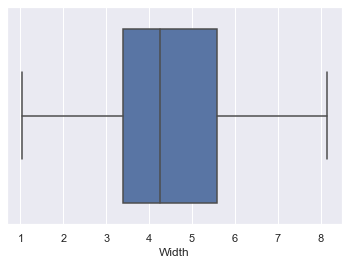

In [141]:
sn.boxplot(x=fish['Width'])

In [142]:
fw = fish['Height']
fw_Q1= fw.quantile(0.25)
fw_Q3= fw.quantile(0.75)
fw_Q2= fw_Q3-fw_Q1
min_ol_fw= fw_Q1-(1.5*fw_Q2)
max_ol_fw= fw_Q3+(1.5*fw_Q2)

In [143]:
fw_outliers = fw[(fw < min_ol_fw)|(fw>max_ol_fw)]
fw_outliers

Series([], Name: Height, dtype: float64)

In [144]:
fish1 = fish.drop([142,143,144])
fish1.shape

(156, 7)

In [145]:
fish.shape

(159, 7)

In [146]:
fish1.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
Length1,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
Length2,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
Length3,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


In [147]:
X= fish1[['Length1','Length2','Length3','Height','Width']]
Y= fish1['Weight']

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [150]:
X_train.shape



(109, 5)

In [151]:
Y_train.shape


(109,)

In [152]:
X_test.shape


(47, 5)

In [153]:
Y_test.shape

(47,)

In [154]:
from sklearn.linear_model import LinearRegression

In [155]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
y_pred= reg.predict(X_test)

In [157]:
y_pred

array([ 266.2441448 ,  322.53856418,  133.39031697,   36.3269938 ,
        703.31973506,  760.42442995,  167.78646271,  538.37605205,
        185.84101898,  712.62102305,  624.66517314,  168.29018829,
        604.01952463,  896.4448434 ,  632.82857816,  753.61012439,
        775.86028283,  398.03373599, -100.42065151,   85.26595311,
        274.85190861,  633.10136951,  523.18799714,  545.46373672,
        758.19620467,  356.59077853,  265.60756855,  280.81894787,
        300.75719793,  238.79000545,  179.38530728, -124.53525382,
        281.27550541,  715.04232094,  845.88642893,  321.45339972,
        922.88193748,  214.28565139,  143.72865253,  664.57307793,
        618.45510617,   98.98282264,  466.21090736,   39.93118033,
         59.63940796,  607.18631196,  608.12276776])

In [158]:
from sklearn import metrics
metrics.r2_score(Y_test,y_pred)

0.895213543861235

In [159]:
Y_test

96      225.0
69      200.0
82      110.0
76       70.0
114     700.0
29     1000.0
94      150.0
132     430.0
93      145.0
139     770.0
19      650.0
90      110.0
15      600.0
125    1100.0
24      700.0
30      920.0
119     850.0
101     218.0
155      13.4
78       78.0
98      188.0
18      610.0
12      500.0
9       500.0
31      955.0
104     265.0
68      145.0
55      270.0
51      180.0
97      145.0
45      160.0
150       8.7
56      270.0
138     567.0
123    1100.0
128     200.0
127    1000.0
66      140.0
42      120.0
26      720.0
134     456.0
79       80.0
131     300.0
36       69.0
75       51.5
22      620.0
135     510.0
Name: Weight, dtype: float64

In [160]:
Predicted_weights = pd.DataFrame(y_pred,columns=['Predicted_weight'])
Predicted_weights.head()

,Predicted_weight
0,266.244145
1,322.538564
2,133.390317
3,36.326994
4,703.319735


In [161]:
Actual_weights = pd.DataFrame(Y_test)
Actual_weights = Actual_weights.reset_index(drop=True)
Actual_weights.head()

,Weight
0,225.0
1,200.0
2,110.0
3,70.0
4,700.0


In [162]:
compare= pd.concat([Actual_weights,Predicted_weights],axis=1)
compare

,Weight,Predicted_weight
0,225.0,266.244145
1,200.0,322.538564
2,110.0,133.390317
3,70.0,36.326994
4,700.0,703.319735
5,1000.0,760.424430
6,150.0,167.786463
7,430.0,538.376052
8,145.0,185.841019
9,770.0,712.621023


Text(0.5, 1.0, 'Test(Blue) vs pred(Red)')

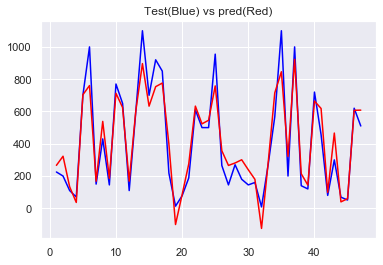

In [163]:
c = [i for i in range(1,48,1)]
plt.plot(c, Y_test,color = 'Blue')
plt.plot(c, y_pred,color = 'red')
plt.title('Test(Blue) vs pred(Red)')

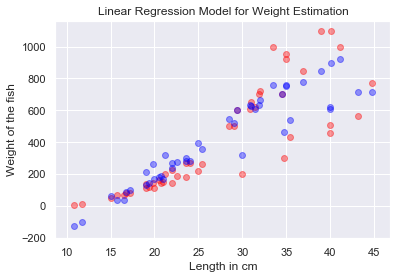

In [165]:
plt.scatter(X_test['Length1'], Y_test, color='red', alpha=0.4)
plt.scatter(X_test['Length1'], y_pred, color='blue', alpha=0.4)
plt.xlabel('Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

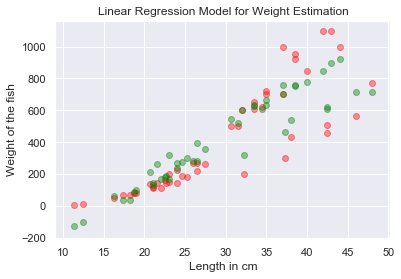

In [167]:
plt.scatter(X_test['Length2'], Y_test, color='red', alpha=0.4)
plt.scatter(X_test['Length2'], y_pred, color='green', alpha=0.4)
plt.xlabel('Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

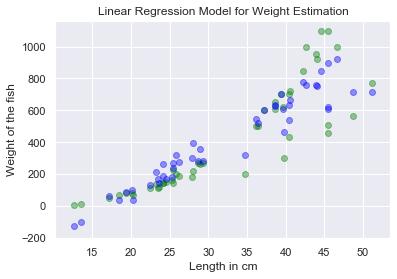

In [170]:
plt.scatter(X_test['Length3'], Y_test, color='green', alpha=0.4)
plt.scatter(X_test['Length3'], y_pred, color='blue', alpha=0.4)
plt.xlabel('Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

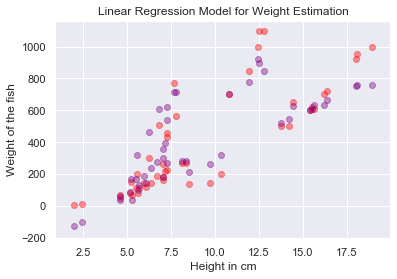

In [172]:
plt.scatter(X_test['Height'], Y_test, color='red', alpha=0.4)
plt.scatter(X_test['Height'], y_pred, color='purple', alpha=0.4)
plt.xlabel('Height in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

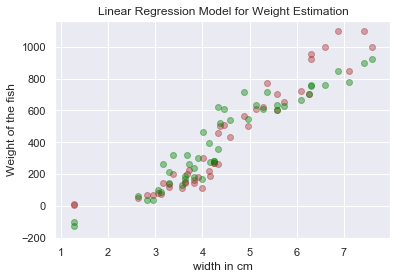

In [174]:
plt.scatter(X_test['Width'], Y_test, color='brown', alpha=0.4)
plt.scatter(X_test['Width'], y_pred, color='green', alpha=0.4)
plt.xlabel('width in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');